# C3M1: Autograded Assignment

### Outline:
**Here are the objectives of this assignment:**

1. Familiarize yourself with odds and how they convert to probabilities.
2. Review Maximum Likelihood Estimates.
3. Understand the difference between Binomial Regression and Logistic Regression.
4. Get a basic understanding of Logistic regression models and properties.
5. Apply Logistic Regression techniques to real data.

**Here are some general tips:**

1. Read the questions carefully to understand what is being asked.
2. When you feel that your work is completed, feel free to hit the ```Validate``` button to see your results on the *visible* unit tests. If you have questions about unit testing, please refer to the "Module 0: Introduction" notebook provided as an optional resource for this course. In this assignment, there are hidden unit tests that check your code. You will not recieve any feedback for failed hidden unit tests until the assignment is submitted. **Do not misinterpret the feedback from visible unit tests as all possible tests for a given question--write your code carefully!**
3. Before submitting, we recommend restarting the kernel and running all the cells in order that they appear to make sure that there are no additional bugs in your code.

In [1]:
# Load necesary libraries
library(testthat)
library(tidyverse)
library(MASS)
library(ggplot2)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.4
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::is_null() masks testthat::is_null()
✖ dplyr::lag()     masks stats::lag()
✖ dplyr::matches() masks tidyr::matches(), testthat::matches()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




# Problem 1: Logistic Regression Basics

Welcome to your first autograded assignment for Generalize Linear Models and Nonparametric Regression. Instead of throwing you directly into the code, let's start off slow with some conceptual questions. We will get to the actual coding part shortly.

### 1. (a) Odds and Ends (5 points each)

For each of the following questions, save your answer in the respecitve variable for that problem. You don't need to show your work, just submit your final answer.


1. What is the equivalent odds for the probability $0.25$?
2. You are testing a new drug and have gathered binary data on whether the drug performed its desired effects. From the control trial, 102 people saw improvement with a placebo and 241 did not. With the drug, 67 people saw improvement and 82 did not. What is the odds ratio of these results?
3. You've decided to determine the probability of a picture containing an animal on social media. On 6 different days, you look at 10 random pictures and record the number of pictures that contain at least one animal, and get the values $\{6, 10, 7, 9, 5, 9\}$. Given these results, what is the MLE for the probability of a picture containing an animal?

In [2]:
# Answer each with the correct numeric value.
prob.1.a.1 = NA

prob.1.a.2 = NA

prob.1.a.3 = NA

prob.1.a.1 <- 0.25/(1-0.25)
prob.1.a.1

prob.1.a.2 <- (67/82)/(102/241)
prob.1.a.2

prob.1.a.3 <- sum(6, 10, 7, 9, 5, 9) / (6 * 10)
prob.1.a.3

[1] 0.3333333

[1] 1.930536

[1] 0.7666667

In [3]:
# Test Cell 
# Be aware, there may be hidden tests that you don't see the answer to. 
# Even if your answers pass all the visible tests, there may be hidden tests that you're not passing.

In [4]:
# Test Cell 
# Be aware, there may be hidden tests that you don't see the answer to. 
# Even if your answers pass all the visible tests, there may be hidden tests that you're not passing.

In [5]:
# Test Cell 
# Be aware, there may be hidden tests that you don't see the answer to. 
# Even if your answers pass all the visible tests, there may be hidden tests that you're not passing.

### 1. (b) Logistic Regression TRUE/FALSE

For each of the following questions, save the boolean `TRUE` or `FALSE` (case sensitive) in the corresponding variable. 

1. Accuracy, Log-Loss and Mean-Squared Error are all evaulation metrics that can be used with Logistic Regression.
2. The Logit link function is defined as the log of the odds function. Therefor, the Logit function has a range of $[0, \infty]$.
3. Suppose you fit a Logistic Regression classifier to a response variable $\in \{0, 1\}$ and get $y = g(\beta_0 + \beta_1x_1 + \beta_2x_2)$ where $\beta_0 = 4, \beta_1=1, \beta_2=-2$ and $g()$ is the link function. Then the input $x_i=(1, 3)$ would be classified as $0$.

In [6]:
# Answer each with either TRUE or FALSE.
prob.1.b.1 = FALSE

prob.1.b.2 = FALSE
# it has a range of -infinity to +infinity

prob.1.b.3 = if_else(1/(1 + exp(-(4 + 1*1 + -2*3))) < 0.5, TRUE, FALSE)
prob.1.b.3

[1] TRUE

In [7]:
# Test Cell

# This cell has hidden test cases that will run after submission.

In [8]:
# Test Cell
# This cell has hidden test cases that will run after submission.

In [9]:
# Test Cell
# This cell has hidden test cases that will run after submission.

# Problem 2: Froggy Apple Crumple Thumpkin

Apparently, other organisms like apple juice too. So much so that some researchers decided to measure the growth of certain bacteria in different apple juice solutions. They measured whether different pH, temperature and molecular concentrations affected the growth of Alicyclobacillus Acidoterrestris CRA7152. 

Lets use their data to practice our Binomial (Logistic) modelling skills. We use the code cell below to load in the data.

In [10]:
# Load the data
apple.data = read.csv("apple_juice.dat", sep="")
names(apple.data) = c("pH", "nisin", "temp", "brix", "growth")
apple.data$growth = as.factor(apple.data$growth)

head(apple.data)

,pH,nisin,temp,brix,growth
,<dbl>,<int>,<int>,<int>,<fct>
1,5.5,70,43,19,0
2,5.5,50,43,13,1
3,5.5,50,35,15,1
4,5.5,30,35,13,1
5,5.5,30,25,11,0
6,5.5,0,50,19,0


### 2. (a) Creating the Model

Fit a logistic regression model to the data, with `growth` as the response and all other variables as the predictors. Save this model as `glmod.apple`. Can you tell whether this model is better than the null model?


Call:
glm(formula = growth ~ ., family = "binomial", data = apple.data)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3245  -0.4325  -0.1415   0.5308   1.5593  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.68363    3.28201  -2.341 0.019225 *  
pH           2.04908    0.57481   3.565 0.000364 ***
nisin       -0.06273    0.01910  -3.283 0.001026 ** 
temp         0.12532    0.05079   2.467 0.013614 *  
brix        -0.38000    0.15909  -2.389 0.016915 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 95.072  on 72  degrees of freedom
Residual deviance: 49.844  on 68  degrees of freedom
AIC: 59.844

Number of Fisher Scoring iterations: 6


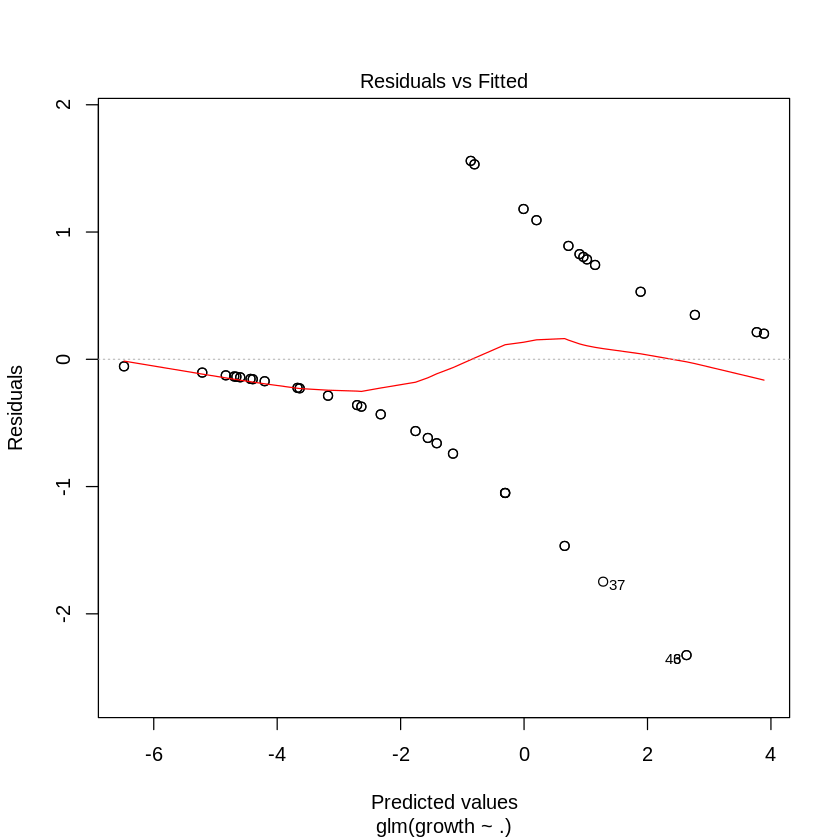

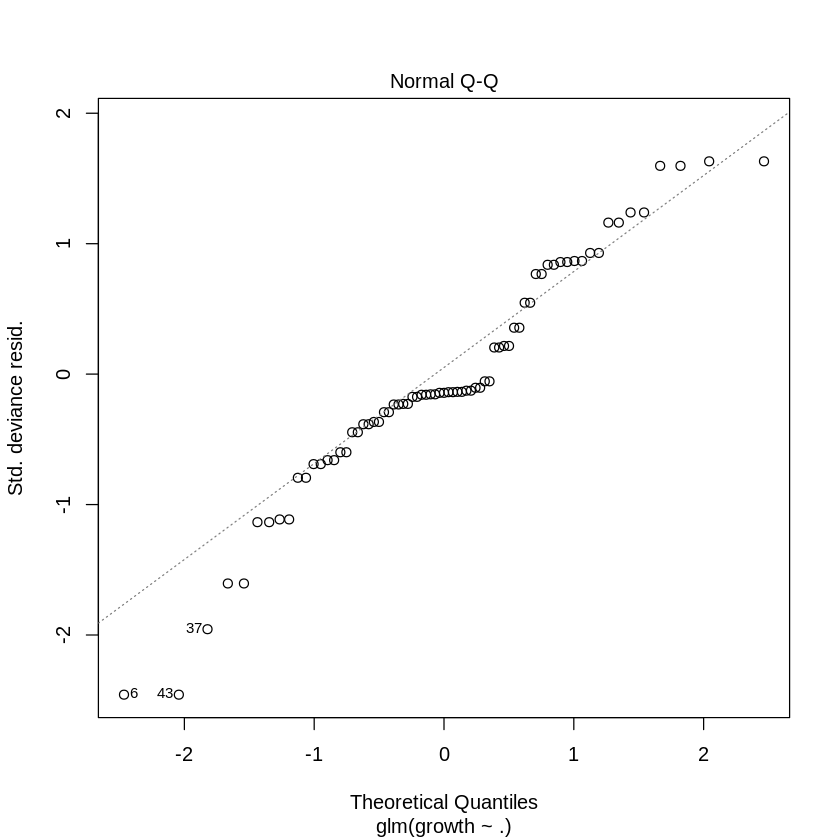

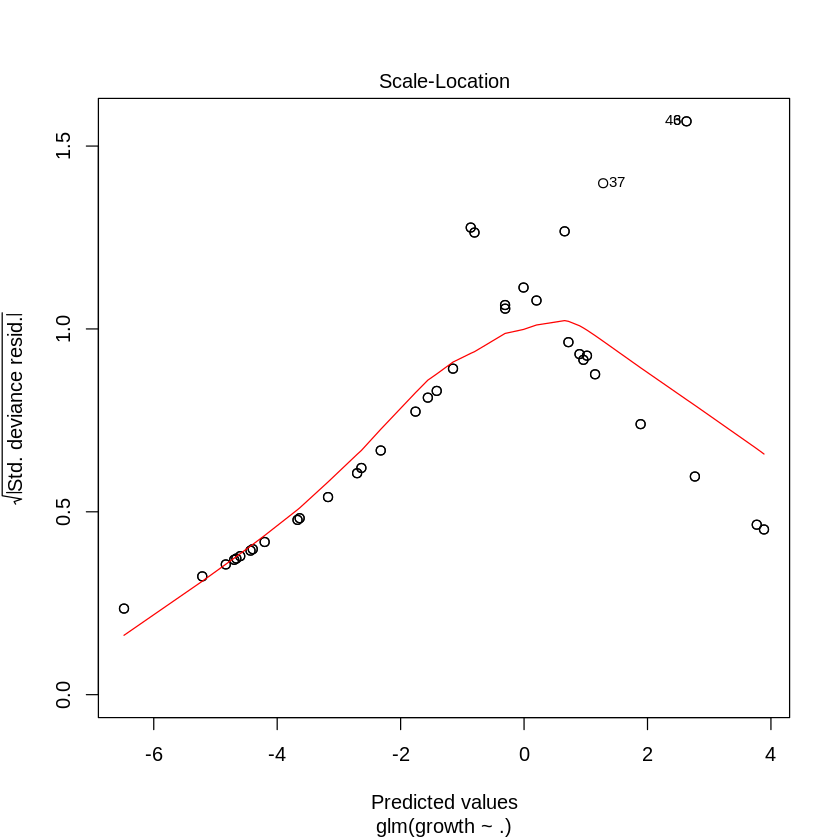

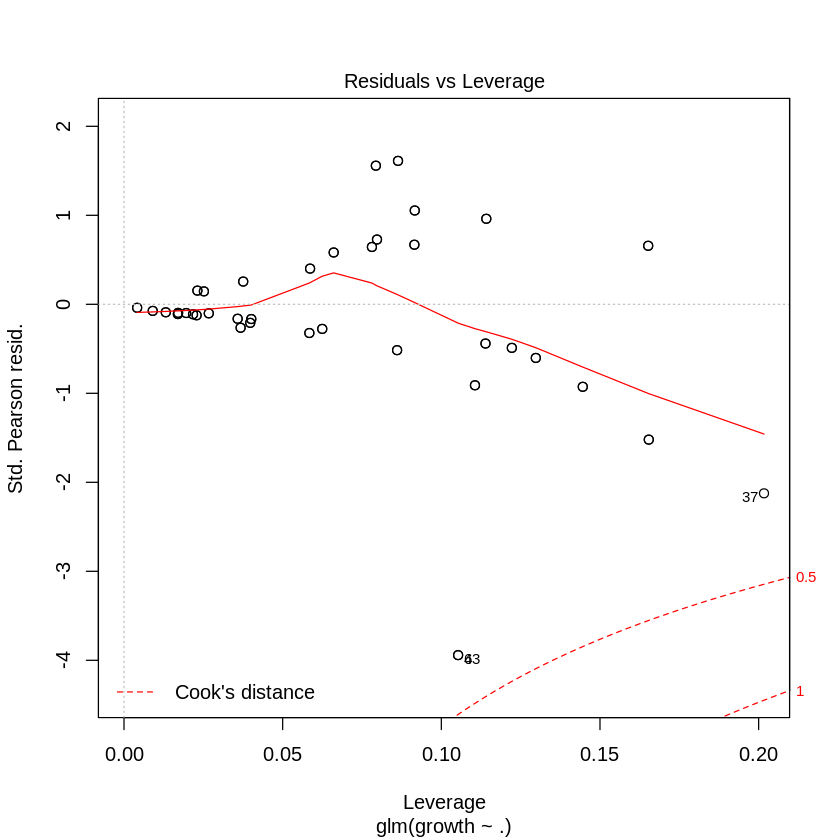

In [11]:
glmod.apple = glm(growth ~., data = apple.data, family = "binomial")
summary(glmod.apple)
plot(glmod.apple)

In [12]:
pchisq(deviance(glmod.apple), df.residual(glmod.apple), lower = FALSE)

[1] 0.9518942

In [13]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 2. (b) The Effects of Temp

What if we want to determine how a specific predictor affects the probability (or odds, in the Logistic Regression case) of `growth=1`? One idea would be to calculate the odds of growth, given different levels of that predictor, while keeping all other predictors constant. Then we could compare the difference between the odds, to see if a larger predictor resulted in a larger probability.

Using your model, calculate the odds of growth with a temperature at the first quartile and at the third quartile, assuming all other features are held constant. Then calculate the difference between the two and store that value as `temp.odds.diff`. 

To calculate this difference, it may be helpful to first think through this equation. Note that $o_i$ is the odds of growth for the $i^{th}$ quantile.

$$d = \frac{o_1}{o_3} = \exp \Big( \log( o_1 / o_3 ) \Big) = \exp \Big( \eta_1 - \eta_3 \Big) = \dots$$

If we let this difference be $d$, then this value can be interpreted as "The odds of showing evidence of growth is $d\%$ more/less when the temperature is in the first quantile than in the third quantile, when adjusted for other predictors."

In [24]:
temp.odds.diff = NA

# identify the first and third temperature quartiles
first_quartile <- quantile(apple.data$temp, p = 0.25)
third_quartile <- quantile(apple.data$temp, p = 0.75)

# calculate the log-odds for each quartile
intercept <- summary(glmod.apple)$coefficients[,1][1]
temp_coef <- summary(glmod.apple)$coefficients[,1][4]

log_odds_first_quartile <- intercept + temp_coef * first_quartile
log_odds_third_quartile <- intercept + temp_coef * third_quartile

# alternatively...
temp.odds.diff = exp(log_odds_first_quartile - log_odds_third_quartile)
temp.odds.diff

(Intercept) 
   0.366951

In [32]:
temp.odds.diff = exp(log_odds_first_quartile) / exp(log_odds_third_quartile)
temp.odds.diff

(Intercept) 
   0.366951

In [15]:
# Test Cell
# This cell has hidden test cases that will run after submission.

### 2. (c) But there's more than that.

Remember, we're assuming all of our predictors come from some distribution, meaning there is some inherent randomness in our values and calculations. A point-value is only so helpful. If we really want to understand the difference, we should calculate the range of values that the difference could potentially fall within.

Calculate the $95\%$ confidence interval for this difference. Store the lower bound in `temp.odds.lower` and the upper bound in `temp.odds.upper`.

Hint: You can get the Standard Error of `temp` from your model.

In [41]:
temp.odds.lower = NA
temp.odds.upper = NA

# extract the standard error
temp.se <- summary(glmod.apple)$coefficients[,2][4]
# calculate the difference on the linear scale
temp.diff <- log_odds_first_quartile - log_odds_third_quartile

# apply the standard CI formula and exponentiate
temp.odds.lower = exp(temp.diff - qnorm(0.975) * temp.se)
temp.odds.upper = exp(temp.diff + qnorm(0.975) * temp.se)

temp.odds.lower
temp.odds.upper

(Intercept) 
  -1.002527

(Intercept) 
   0.332181

(Intercept) 
  0.4053606

In [17]:
# Test Cell
# This cell has hidden test cases that will run after submission.